In [3]:
import pytc
%matplotlib inline

# libraries for making pretty sliders
from IPython.html import widgets
from IPython.html.widgets import interactive
from IPython.display import display

from matplotlib import pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages

import numpy as np

### Create a hacked-together GUI for slider fitting tests

In [4]:
### BASIC EXPERIMENTAL TEMPLATE, WITH HACKED TOGETHER GUI ####

class Interface:
    
    def __init__(self,fitter):
        """
        """
        
        self._global_sliders = {}
        self._local_sliders = []
        self._fitter = fitter
        self._experiments = [] 
    
    def add_experiment(self,expt,**kwargs):
        
        self._fitter.add_experiment(expt,**kwargs)
        self._experiments.append(expt)
        
    
    def build_interface(self):
        """
        """
    
        global_param, local_param = self._fitter.param_names
        global_guesses, local_guesses = self._fitter.param_guesses
        global_ranges, local_ranges = self._fitter.param_ranges
        global_fixed, local_fixed = self._fitter.fixed_param 
        
        all_widgets = {}
        for p in global_param:
        
            g_min = global_ranges[p][0]
            g_max = global_ranges[p][1]
            g_val = global_guesses[p]
            
            self._global_sliders[p] = widgets.FloatSlider(min=g_min,max=g_max,value=g_val)
            
            all_widgets["{}".format(p)] = self._global_sliders[p]
    
        for i in range(len(self._experiments)):            
            
            self._local_sliders.append({})
        
            for p in local_param[i]:
            
                g_min = local_ranges[i][p][0]
                g_max = local_ranges[i][p][1]
                g_val = local_guesses[i][p]
                
                self._local_sliders[-1][p] = widgets.FloatSlider(min=g_min,max=g_max,value=g_val)
        
                all_widgets["{},{}".format(p,i)] = self._local_sliders[-1][p]
            
        w = widgets.interactive(self._update,**all_widgets)
                        
        display(w)
        
        btn = widgets.Button(description="Show Fit")
        btn.on_click(self.get_param)
        display(btn)

    def _update(self,**kwargs):
        """
        """
        
        for k in kwargs.keys():
            if len(k.split(",")) == 1:
                self._fitter.update_guess(k,kwargs[k])
            else:
                
                param_name = k.split(",")[0]
                expt = self._experiments[int(k.split(",")[1])]
                self._fitter.update_guess(param_name,kwargs[k],expt)
       
        self._fitter.fit()
        self._fitter.plot(correct_molar_ratio=True) #,subtract_dilution=True) #,correct_molar_ratio=True)
        
        
        #print(self._fitter.fit_param)
        for k in g.fit_param[0].keys():
            print("global",k,g.fit_param[0][k],g.fit_error[0][k])
    
        for i in range(len(g.fit_param[1])):
            for k in g.fit_param[1][i].keys():
                print("local",i,k,g.fit_param[1][i][k],g.fit_error[1][i][k])
        
    def get_param(self):
        
        print(self._fitter.fit_param)

    

### Global fit to proton-linked calcium/EDTA binding for different buffers

/home/harmsm/work/programming/git-clones/pytc/pytc/experiments.py:90: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._model.dQ == None:


global num_protons -0.937760125577 2.63197590296
global dH_global -625.74255043 0.0376266516764
global global_K 39054790.6171 7.59888744364e-06
local 0 dH -5197.99555276 0.0
local 0 dilution_intercept 2.64973726061 0.0
local 0 fx_competent 1.07927827417 0.0
local 0 dilution_heat -20357.9943955 0.0
local 0 K 39054790.6171 0.0
local 1 dH -5197.99555276 0.0
local 1 dilution_intercept 2.20778587151 0.0
local 1 fx_competent 1.08338774771 0.0
local 1 dilution_heat -17783.015855 0.0
local 1 K 39054790.6171 0.0
local 2 dH -5197.99555276 0.0
local 2 dilution_intercept 2.31037352868 0.0
local 2 fx_competent 1.08776229382 0.0
local 2 dilution_heat -18599.3291787 0.0
local 2 K 39054790.6171 0.0
local 3 dH -5197.99555276 0.0
local 3 dilution_intercept 2.25653853937 0.535207287494
local 3 fx_competent 1.10041824333 0.0634133304681
local 3 dilution_heat -19451.6995601 0.0022771206073
local 3 K 39054790.6171 0.0
local 4 dH -11260.7133818 0.0
local 4 dilution_intercept 3.74158844778 0.0
local 4 fx_comp

/home/harmsm/work/programming/git-clones/pytc/pytc/proton_linked.py:200: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if e.dQ != None:
/home/harmsm/work/programming/git-clones/pytc/pytc/proton_linked.py:215: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if e.dQ != None:


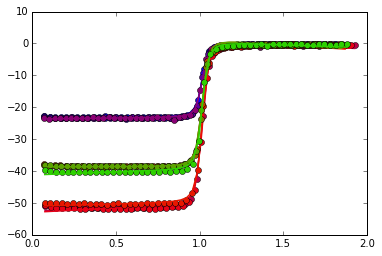

In [8]:

g = pytc.ProtonLinked()
X = Interface(g)

hepes1 = pytc.ITCExperiment("ca-edta-expt/HEPES/CaEDTAHEPES03_area.DH",pytc.models.SingleSite,shot_start=2)
hepes2 = pytc.ITCExperiment("ca-edta-expt/HEPES/CaEDTAHEPES05_area.DH",pytc.models.SingleSite,shot_start=2)
hepes3 = pytc.ITCExperiment("ca-edta-expt/HEPES/CaEDTAHEPES06_area.DH",pytc.models.SingleSite,shot_start=2)
hepes4 = pytc.ITCExperiment("ca-edta-expt/HEPES/CaEDTAHEPES07_area.DH",pytc.models.SingleSite,shot_start=2)
#hepes5 = pytc.ITCExperiment("ca-edta-expt/HEPES/CaHEPESBlank_out.DH",pytc.models.Blank,shot_start=2)

tris1 = pytc.ITCExperiment("ca-edta-expt/Tris/CaEDTATris05_area.DH",pytc.models.SingleSite,shot_start=2)
tris2 = pytc.ITCExperiment("ca-edta-expt/Tris/CaEDTATris06_area.DH",pytc.models.SingleSite,shot_start=2)
tris3 = pytc.ITCExperiment("ca-edta-expt/Tris/CaEDTATris07_area.DH",pytc.models.SingleSite,shot_start=2)
#tris4 = pytc.ITCExperiment("ca-edta-expt/Tris/CaTrisBlank.DH",pytc.models.Blank,shot_start=2)

imid1 = pytc.ITCExperiment("ca-edta-expt/Imidazole/CaEDTAImid04_area.DH",pytc.models.SingleSite,shot_start=2)
#imid2 = pytc.ITCExperiment("ca-edta-expt/Imidazole/CaEDTAImid07_area.DH",pytc.models.SingleSite,shot_start=2)
imid3 = pytc.ITCExperiment("ca-edta-expt/Imidazole/CaEDTAImid06_area.DH",pytc.models.SingleSite,shot_start=2)
imid4 = pytc.ITCExperiment("ca-edta-expt/Imidazole/CaEDTAImid08_area.DH",pytc.models.SingleSite,shot_start=2)
imid5 = pytc.ITCExperiment("ca-edta-expt/Imidazole/CaEDTAImid09_area.DH",pytc.models.SingleSite,shot_start=2)
#imid6 = pytc.ITCExperiment("ca-edta-expt/Imidazole/CaImidBlank_out.DH",pytc.models.Blank,shot_start=2)


#goldberg et al (2002) Journal of Physical and Chemical Reference Data 31 231,  doi: 10.1063/1.1416902
hepes_ionization_dH = 20.4/4.184*1000
imid_ionization_dH = 36.64/4.184*1000
tris_ionization_dH = 47.45/4.184*1000


X.add_experiment(hepes1,ionization_enthalpy=hepes_ionization_dH)
X.add_experiment(hepes2,ionization_enthalpy=hepes_ionization_dH)  
X.add_experiment(hepes3,ionization_enthalpy=hepes_ionization_dH)
X.add_experiment(hepes4,ionization_enthalpy=hepes_ionization_dH)
#X.add_experiment(hepes5,ionization_enthalpy=hepes_ionization_dH)

X.add_experiment(tris1,ionization_enthalpy=tris_ionization_dH)
X.add_experiment(tris2,ionization_enthalpy=tris_ionization_dH)  
X.add_experiment(tris3,ionization_enthalpy=tris_ionization_dH)
#X.add_experiment(tris4,ionization_enthalpy=tris_ionization_dH)

X.add_experiment(imid1,ionization_enthalpy=imid_ionization_dH)
#X.add_experiment(imid2,ionization_enthalpy=imid_ionization_dH)
X.add_experiment(imid3,ionization_enthalpy=imid_ionization_dH)
X.add_experiment(imid4,ionization_enthalpy=imid_ionization_dH)
X.add_experiment(imid5,ionization_enthalpy=imid_ionization_dH)
#X.add_experiment(imid6,ionization_enthalpy=imid_ionization_dH)


g.link_to_global(hepes1,"K","global_K")
g.link_to_global(hepes2,"K","global_K")
g.link_to_global(hepes3,"K","global_K")
g.link_to_global(hepes4,"K","global_K")

g.link_to_global(tris1,"K","global_K")
g.link_to_global(tris2,"K","global_K")
g.link_to_global(tris3,"K","global_K")

g.link_to_global(imid1,"K","global_K")
#g.link_to_global(imid2,"K","global_K")
g.link_to_global(imid3,"K","global_K")
g.link_to_global(imid4,"K","global_K")
g.link_to_global(imid5,"K","global_K")

"""
g.link_to_global(hepes1,"dH","dH_hepes")
g.link_to_global(hepes2,"dH","dH_hepes")
g.link_to_global(hepes3,"dH","dH_hepes")
g.link_to_global(hepes4,"dH","dH_hepes")

g.link_to_global(tris1,"dH","dH_tris")
g.link_to_global(tris2,"dH","dH_tris")
g.link_to_global(tris3,"dH","dH_tris")

g.link_to_global(imid1,"dH","dH_imid")
g.link_to_global(imid2,"dH","dH_imid")
g.link_to_global(imid3,"dH","dH_imid")
g.link_to_global(imid4,"dH","dH_imid")
g.link_to_global(imid5,"dH","dH_imid")
"""

g.link_to_global(hepes1,"dH","dH_global")
g.link_to_global(hepes2,"dH","dH_global")
g.link_to_global(hepes3,"dH","dH_global")
g.link_to_global(hepes4,"dH","dH_global")

g.link_to_global(tris1,"dH","dH_global")
g.link_to_global(tris2,"dH","dH_global")
g.link_to_global(tris3,"dH","dH_global")

g.link_to_global(imid1,"dH","dH_global")
#g.link_to_global(imid2,"dH","dH_global")
g.link_to_global(imid3,"dH","dH_global")
g.link_to_global(imid4,"dH","dH_global")
g.link_to_global(imid5,"dH","dH_global")


"""
g.link_to_global(hepes1,"dilution_heat","hepes_heat")
g.link_to_global(hepes2,"dilution_heat","hepes_heat")
g.link_to_global(hepes3,"dilution_heat","hepes_heat")
g.link_to_global(hepes4,"dilution_heat","hepes_heat")
g.link_to_global(hepes5,"dilution_heat","hepes_heat")

g.link_to_global(tris1,"dilution_heat","tris_heat")
g.link_to_global(tris2,"dilution_heat","tris_heat")
g.link_to_global(tris3,"dilution_heat","tris_heat")
g.link_to_global(tris4,"dilution_heat","tris_heat")

g.link_to_global(imid1,"dilution_heat","imid_heat")
#g.link_to_global(imid2,"dilution_heat","imid_heat")
g.link_to_global(imid3,"dilution_heat","imid_heat")
g.link_to_global(imid4,"dilution_heat","imid_heat")
g.link_to_global(imid5,"dilution_heat","imid_heat")
g.link_to_global(imid6,"dilution_heat","imid_heat")

g.link_to_global(hepes1,"dilution_intercept","hepes_intercept")
g.link_to_global(hepes2,"dilution_intercept","hepes_intercept")
g.link_to_global(hepes3,"dilution_intercept","hepes_intercept")
g.link_to_global(hepes4,"dilution_intercept","hepes_intercept")
g.link_to_global(hepes5,"dilution_intercept","hepes_intercept")

g.link_to_global(tris1,"dilution_intercept","tris_intercept")
g.link_to_global(tris2,"dilution_intercept","tris_intercept")
g.link_to_global(tris3,"dilution_intercept","tris_intercept")
g.link_to_global(tris4,"dilution_intercept","tris_intercept")

g.link_to_global(imid1,"dilution_intercept","imid_intercept")
#g.link_to_global(imid2,"dilution_intercept","imid_intercept")
g.link_to_global(imid3,"dilution_intercept","imid_intercept")
g.link_to_global(imid4,"dilution_intercept","imid_intercept")
g.link_to_global(imid5,"dilution_intercept","imid_intercept")
g.link_to_global(imid6,"dilution_intercept","imid_intercept")
"""


g.update_bounds("global_K",(1,np.inf))
g.update_bounds("num_protons",(-5.0,5.0))

X.build_interface()

### Pure API globaln fit to proton-linked calcium/EDTA titration in different buffers

/home/harmsm/work/programming/git-clones/pytc/pytc/experiments.py:90: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._model.dQ == None:


global num_protons -0.937760338114 3.52731708258
global dH_global -625.742549846 0.037626651907
global global_K 39054624.8739 9.90972579421e-06
local 0 dH -5197.99658845 0.0
local 0 dilution_intercept 2.64974373625 0.0
local 0 fx_competent 1.07927827355 0.0
local 0 dilution_heat -20358.0372573 0.0
local 0 K 39054624.8739 0.0
local 1 dH -5197.99658845 0.0
local 1 dilution_intercept 2.20779237531 0.0
local 1 fx_competent 1.08338775006 0.0
local 1 dilution_heat -17783.0584978 0.0
local 1 K 39054624.8739 0.0
local 2 dH -5197.99658845 0.0
local 2 dilution_intercept 2.31038002744 0.0
local 2 fx_competent 1.08776229236 0.0
local 2 dilution_heat -18599.3721642 0.0
local 2 K 39054624.8739 0.0
local 3 dH -5197.99658845 0.0
local 3 dilution_intercept 2.25654504412 0.0
local 3 fx_competent 1.10041824208 0.0
local 3 dilution_heat -19451.7422693 0.0
local 3 K 39054624.8739 0.0
local 4 dH -11260.7157916 0.0
local 4 dilution_intercept 3.74160333673 0.0
local 4 fx_competent 1.0158134969 0.0
local 4 dil

/home/harmsm/work/programming/git-clones/pytc/pytc/proton_linked.py:200: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if e.dQ != None:
/home/harmsm/work/programming/git-clones/pytc/pytc/proton_linked.py:215: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if e.dQ != None:


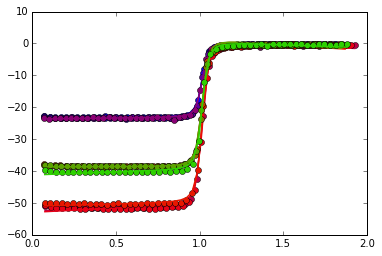

In [9]:

g = pytc.ProtonLinked()

hepes1 = pytc.ITCExperiment("ca-edta-expt/HEPES/CaEDTAHEPES03_area.DH",pytc.models.SingleSite,shot_start=2)
hepes2 = pytc.ITCExperiment("ca-edta-expt/HEPES/CaEDTAHEPES05_area.DH",pytc.models.SingleSite,shot_start=2)
hepes3 = pytc.ITCExperiment("ca-edta-expt/HEPES/CaEDTAHEPES06_area.DH",pytc.models.SingleSite,shot_start=2)
hepes4 = pytc.ITCExperiment("ca-edta-expt/HEPES/CaEDTAHEPES07_area.DH",pytc.models.SingleSite,shot_start=2)
#hepes5 = pytc.ITCExperiment("ca-edta-expt/HEPES/CaHEPESBlank_out.DH",pytc.models.Blank,shot_start=2)

tris1 = pytc.ITCExperiment("ca-edta-expt/Tris/CaEDTATris05_area.DH",pytc.models.SingleSite,shot_start=2)
tris2 = pytc.ITCExperiment("ca-edta-expt/Tris/CaEDTATris06_area.DH",pytc.models.SingleSite,shot_start=2)
tris3 = pytc.ITCExperiment("ca-edta-expt/Tris/CaEDTATris07_area.DH",pytc.models.SingleSite,shot_start=2)
#tris4 = pytc.ITCExperiment("ca-edta-expt/Tris/CaTrisBlank.DH",pytc.models.Blank,shot_start=2)

imid1 = pytc.ITCExperiment("ca-edta-expt/Imidazole/CaEDTAImid04_area.DH",pytc.models.SingleSite,shot_start=2)
#imid2 = pytc.ITCExperiment("ca-edta-expt/Imidazole/CaEDTAImid07_area.DH",pytc.models.SingleSite,shot_start=2)
imid3 = pytc.ITCExperiment("ca-edta-expt/Imidazole/CaEDTAImid06_area.DH",pytc.models.SingleSite,shot_start=2)
imid4 = pytc.ITCExperiment("ca-edta-expt/Imidazole/CaEDTAImid08_area.DH",pytc.models.SingleSite,shot_start=2)
imid5 = pytc.ITCExperiment("ca-edta-expt/Imidazole/CaEDTAImid09_area.DH",pytc.models.SingleSite,shot_start=2)
#imid6 = pytc.ITCExperiment("ca-edta-expt/Imidazole/CaImidBlank_out.DH",pytc.models.Blank,shot_start=2)


#goldberg et al (2002) Journal of Physical and Chemical Reference Data 31 231,  doi: 10.1063/1.1416902
hepes_ionization_dH = 20.4/4.184*1000
imid_ionization_dH = 36.64/4.184*1000
tris_ionization_dH = 47.45/4.184*1000


g.add_experiment(hepes1,ionization_enthalpy=hepes_ionization_dH)
g.add_experiment(hepes2,ionization_enthalpy=hepes_ionization_dH)  
g.add_experiment(hepes3,ionization_enthalpy=hepes_ionization_dH)
g.add_experiment(hepes4,ionization_enthalpy=hepes_ionization_dH)
#g.add_experiment(hepes5,ionization_enthalpy=hepes_ionization_dH)

g.add_experiment(tris1,ionization_enthalpy=tris_ionization_dH)
g.add_experiment(tris2,ionization_enthalpy=tris_ionization_dH)  
g.add_experiment(tris3,ionization_enthalpy=tris_ionization_dH)
#g.add_experiment(tris4,ionization_enthalpy=tris_ionization_dH)

g.add_experiment(imid1,ionization_enthalpy=imid_ionization_dH)
#g.add_experiment(imid2,ionization_enthalpy=imid_ionization_dH)
g.add_experiment(imid3,ionization_enthalpy=imid_ionization_dH)
g.add_experiment(imid4,ionization_enthalpy=imid_ionization_dH)
g.add_experiment(imid5,ionization_enthalpy=imid_ionization_dH)
#g.add_experiment(imid6,ionization_enthalpy=imid_ionization_dH)


g.link_to_global(hepes1,"K","global_K")
g.link_to_global(hepes2,"K","global_K")
g.link_to_global(hepes3,"K","global_K")
g.link_to_global(hepes4,"K","global_K")

g.link_to_global(tris1,"K","global_K")
g.link_to_global(tris2,"K","global_K")
g.link_to_global(tris3,"K","global_K")

g.link_to_global(imid1,"K","global_K")
#g.link_to_global(imid2,"K","global_K")
g.link_to_global(imid3,"K","global_K")
g.link_to_global(imid4,"K","global_K")
g.link_to_global(imid5,"K","global_K")

"""
g.link_to_global(hepes1,"dH","dH_hepes")
g.link_to_global(hepes2,"dH","dH_hepes")
g.link_to_global(hepes3,"dH","dH_hepes")
g.link_to_global(hepes4,"dH","dH_hepes")

g.link_to_global(tris1,"dH","dH_tris")
g.link_to_global(tris2,"dH","dH_tris")
g.link_to_global(tris3,"dH","dH_tris")

g.link_to_global(imid1,"dH","dH_imid")
g.link_to_global(imid2,"dH","dH_imid")
g.link_to_global(imid3,"dH","dH_imid")
g.link_to_global(imid4,"dH","dH_imid")
g.link_to_global(imid5,"dH","dH_imid")
"""

g.link_to_global(hepes1,"dH","dH_global")
g.link_to_global(hepes2,"dH","dH_global")
g.link_to_global(hepes3,"dH","dH_global")
g.link_to_global(hepes4,"dH","dH_global")

g.link_to_global(tris1,"dH","dH_global")
g.link_to_global(tris2,"dH","dH_global")
g.link_to_global(tris3,"dH","dH_global")

g.link_to_global(imid1,"dH","dH_global")
#g.link_to_global(imid2,"dH","dH_global")
g.link_to_global(imid3,"dH","dH_global")
g.link_to_global(imid4,"dH","dH_global")
g.link_to_global(imid5,"dH","dH_global")


"""
g.link_to_global(hepes1,"dilution_heat","hepes_heat")
g.link_to_global(hepes2,"dilution_heat","hepes_heat")
g.link_to_global(hepes3,"dilution_heat","hepes_heat")
g.link_to_global(hepes4,"dilution_heat","hepes_heat")
g.link_to_global(hepes5,"dilution_heat","hepes_heat")

g.link_to_global(tris1,"dilution_heat","tris_heat")
g.link_to_global(tris2,"dilution_heat","tris_heat")
g.link_to_global(tris3,"dilution_heat","tris_heat")
g.link_to_global(tris4,"dilution_heat","tris_heat")

g.link_to_global(imid1,"dilution_heat","imid_heat")
#g.link_to_global(imid2,"dilution_heat","imid_heat")
g.link_to_global(imid3,"dilution_heat","imid_heat")
g.link_to_global(imid4,"dilution_heat","imid_heat")
g.link_to_global(imid5,"dilution_heat","imid_heat")
g.link_to_global(imid6,"dilution_heat","imid_heat")

g.link_to_global(hepes1,"dilution_intercept","hepes_intercept")
g.link_to_global(hepes2,"dilution_intercept","hepes_intercept")
g.link_to_global(hepes3,"dilution_intercept","hepes_intercept")
g.link_to_global(hepes4,"dilution_intercept","hepes_intercept")
g.link_to_global(hepes5,"dilution_intercept","hepes_intercept")

g.link_to_global(tris1,"dilution_intercept","tris_intercept")
g.link_to_global(tris2,"dilution_intercept","tris_intercept")
g.link_to_global(tris3,"dilution_intercept","tris_intercept")
g.link_to_global(tris4,"dilution_intercept","tris_intercept")

g.link_to_global(imid1,"dilution_intercept","imid_intercept")
#g.link_to_global(imid2,"dilution_intercept","imid_intercept")
g.link_to_global(imid3,"dilution_intercept","imid_intercept")
g.link_to_global(imid4,"dilution_intercept","imid_intercept")
g.link_to_global(imid5,"dilution_intercept","imid_intercept")
g.link_to_global(imid6,"dilution_intercept","imid_intercept")
"""


g.update_bounds("global_K",(1,np.inf))
g.update_bounds("num_protons",(-5.0,5.0))

g.fit()


g.plot(correct_molar_ratio=True) #,subtract_dilution=True) #,correct_molar_ratio=True)
        
        
for k in g.fit_param[0].keys():
    print("global",k,g.fit_param[0][k],g.fit_error[0][k])
    
for i in range(len(g.fit_param[1])):
    for k in g.fit_param[1][i].keys():
        print("local",i,k,g.fit_param[1][i][k],g.fit_error[1][i][k])